In [15]:
import lightgbm as lgb
import re
import colorgram
from PIL import Image
import matplotlib.pyplot as plt 
import pandas as pd
import colorsys
from colorthief import ColorThief
import numpy as np

In [43]:
data=pd.read_csv('./train_fresh.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,189,206,115,135,134,152,110,172,26,105,109,77,32,37,32
1,242,241,237,148,179,120,101,132,51,114,62,50,47,103,42
2,219,218,209,165,172,153,89,105,69,84,83,77,68,70,62
3,223,231,203,160,192,182,166,201,135,150,166,123,83,114,69
4,241,243,232,213,233,142,141,167,79,84,84,82,63,84,27


In [41]:
gbm=lgb.Booster(model_file='./model.txt')

In [6]:
# param: palette,eg:[(r,g,b),(r,g,b),(r,g,b),(r,g,b),(r,g,b)]
# return style ['cute','fresh','technology']
def style_predict(palette):
    def sortByLight2(elem):
        hls=colorsys.rgb_to_hls(*elem)
        return hls[1]
    # build a color palette
    palette.sort(key=sortByLight2,reverse=True)
    palette1=[*palette[0],*palette[1],*palette[2],*palette[3],*palette[4]]
    for c in palette:
        h,l,s=colorsys.rgb_to_hls(*c)
        palette1=[*palette1,h,l,s]
    x=pd.Series(palette1)
    y_pred = gbm.predict(x, num_iteration=gbm.best_iteration)
    pred_Y=[0 for i in range(len(y_pred))]
    y_pred=y_pred.tolist()
    style=['cute','fresh','technology']
    for i in range(len(y_pred)):
        pred_Y[i]=y_pred[i][:].index(max(y_pred[i][:]))
    return style[pred_Y[0]]

In [7]:
def sortByLight2(elem):
        hls=colorsys.rgb_to_hls(*elem)
        return hls[1]


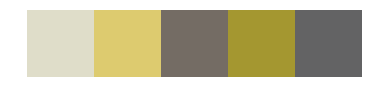

fresh


E:\Users\ASUS\Anaconda3\lib\site-packages\lightgbm\basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


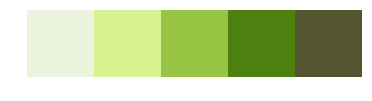

fresh


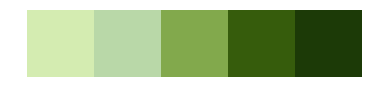

fresh


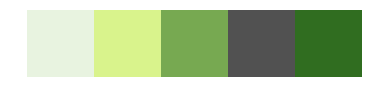

fresh


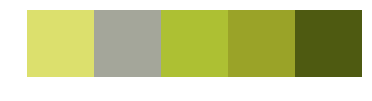

fresh


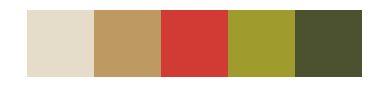

fresh


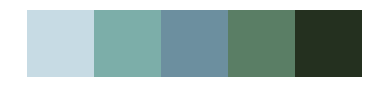

fresh


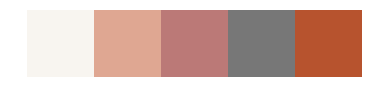

cute


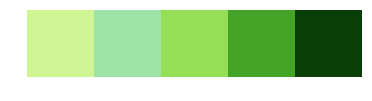

fresh


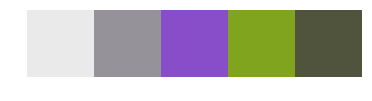

fresh


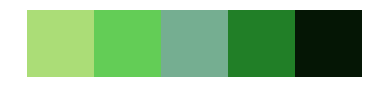

fresh


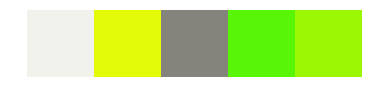

fresh


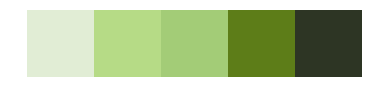

fresh


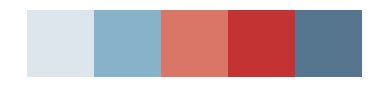

cute


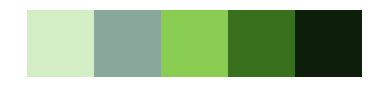

fresh


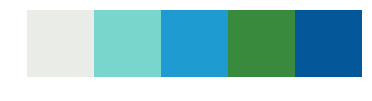

fresh


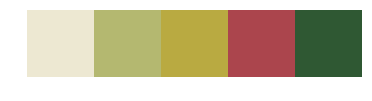

fresh


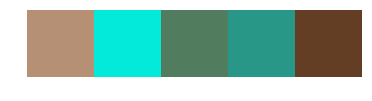

fresh


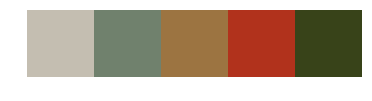

fresh


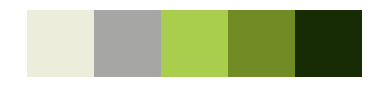

fresh


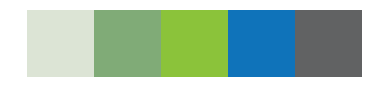

fresh


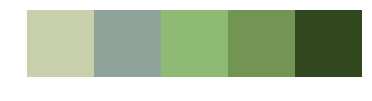

fresh


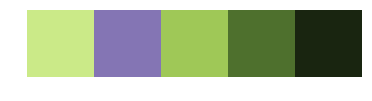

fresh


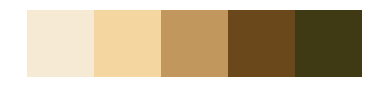

fresh


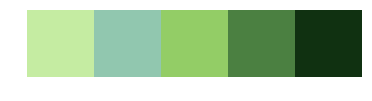

fresh


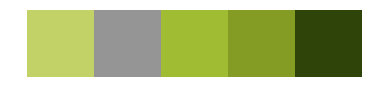

fresh


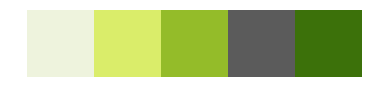

fresh


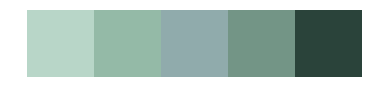

fresh


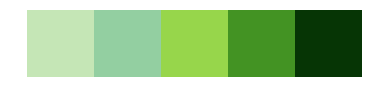

fresh


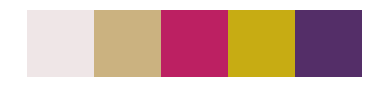

cute


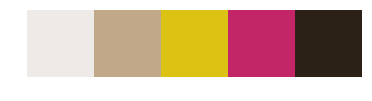

cute


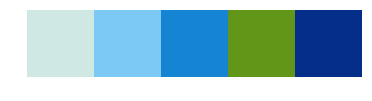

fresh


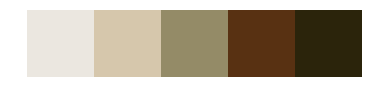

fresh


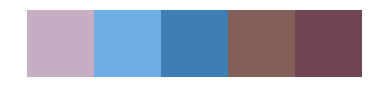

technology


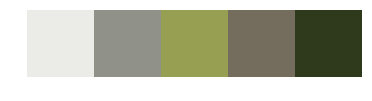

fresh


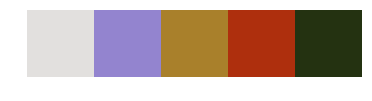

fresh


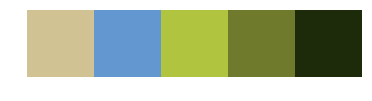

fresh


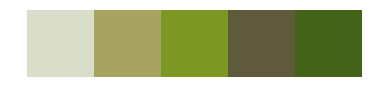

fresh


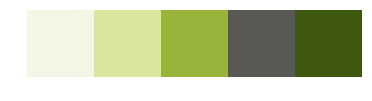

fresh


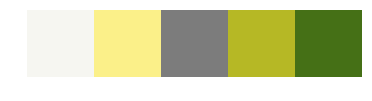

fresh


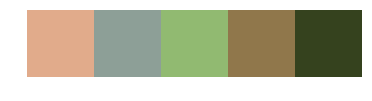

fresh


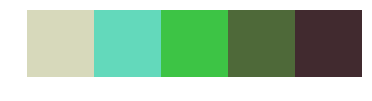

fresh


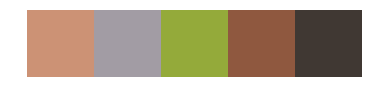

fresh


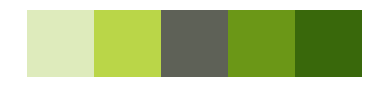

fresh


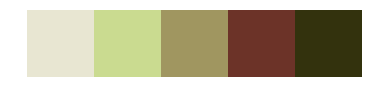

fresh


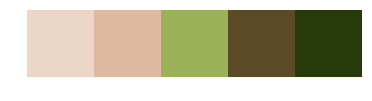

fresh


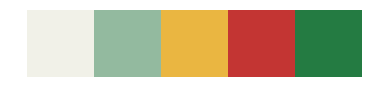

fresh


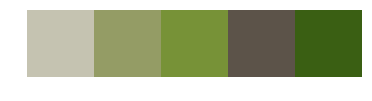

fresh


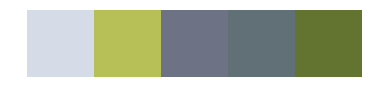

fresh


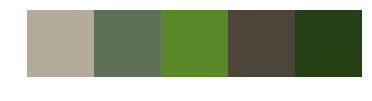

fresh


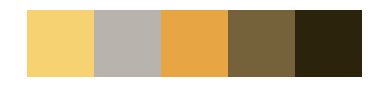

fresh


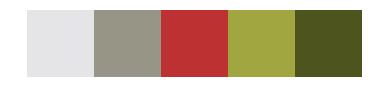

fresh


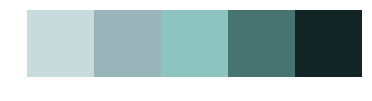

technology


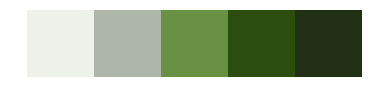

fresh


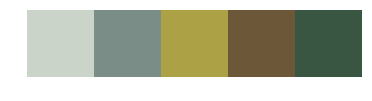

fresh


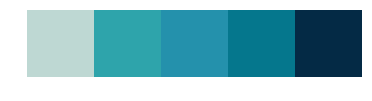

technology


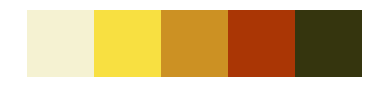

fresh


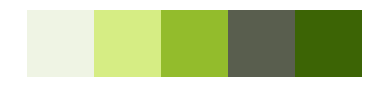

fresh


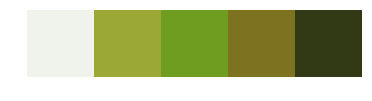

fresh


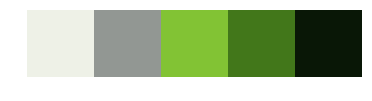

fresh


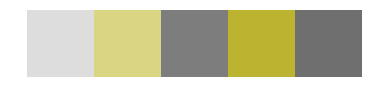

fresh


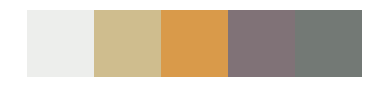

cute


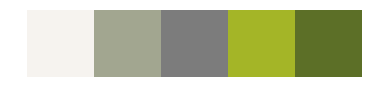

fresh


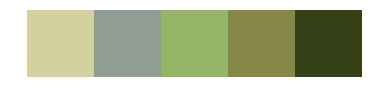

fresh


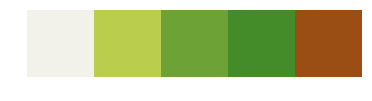

fresh


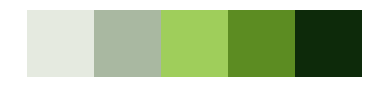

fresh


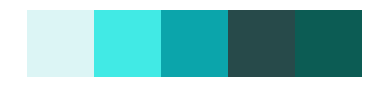

technology


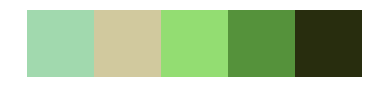

fresh


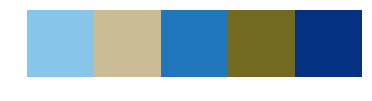

technology


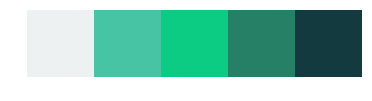

fresh


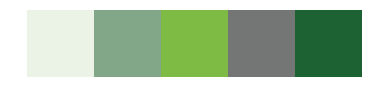

fresh


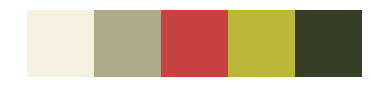

fresh


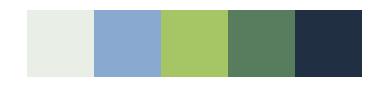

fresh


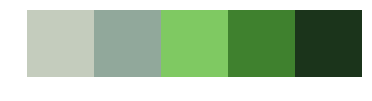

fresh


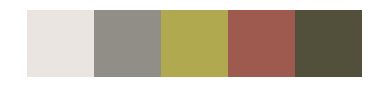

fresh


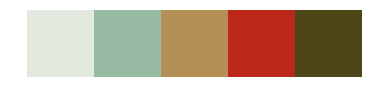

fresh


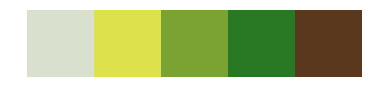

fresh


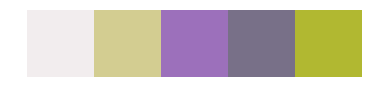

fresh


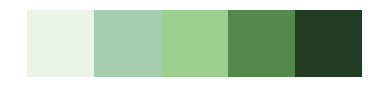

fresh


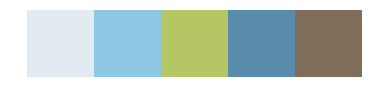

fresh


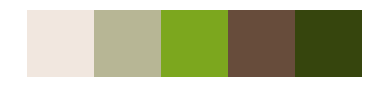

fresh


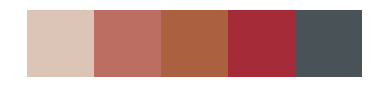

cute


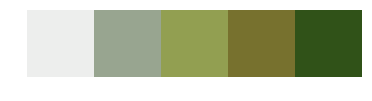

fresh


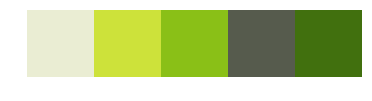

fresh


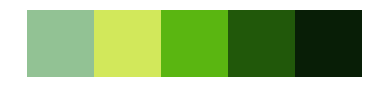

fresh


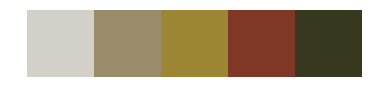

fresh


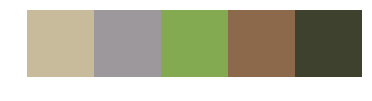

fresh


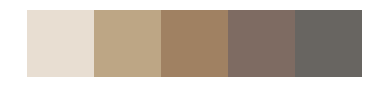

cute


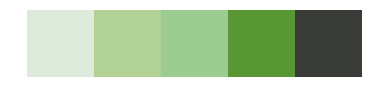

fresh


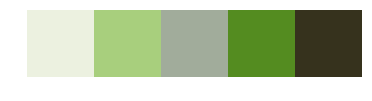

fresh


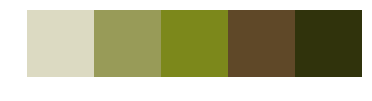

fresh


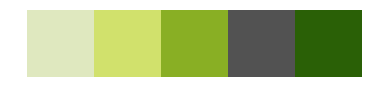

fresh


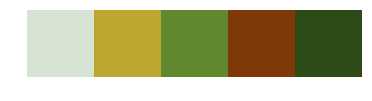

fresh


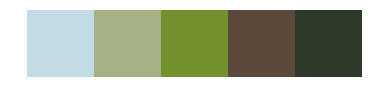

fresh


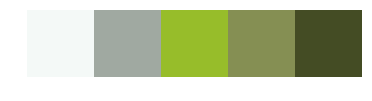

fresh


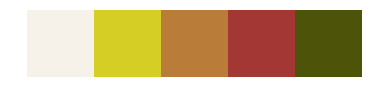

fresh


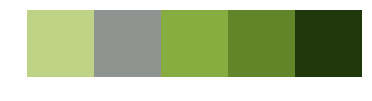

fresh


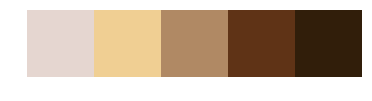

fresh


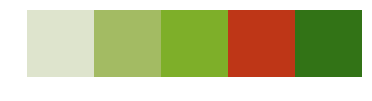

fresh


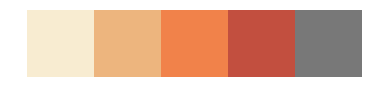

cute


In [44]:
sample=data.sample(100)
for index, row in sample.iterrows():
    c1=(row[0],row[1],row[2])
    c2=(row[3],row[4],row[5])
    c3=(row[6],row[7],row[8])
    c4=(row[9],row[10],row[11])
    c5=(row[12],row[13],row[14])
    palette=[c1,c2,c3,c4,c5]
    show(palette)
    print(style_predict(palette))

In [19]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 49445 to 39190
Data columns (total 15 columns):
0     100 non-null object
1     100 non-null float64
2     100 non-null float64
3     100 non-null float64
4     100 non-null float64
5     100 non-null float64
6     100 non-null float64
7     100 non-null float64
8     100 non-null float64
9     100 non-null float64
10    100 non-null float64
11    100 non-null float64
12    100 non-null float64
13    100 non-null float64
14    100 non-null float64
dtypes: float64(14), object(1)
memory usage: 12.5+ KB
